In [1]:
import os

import numpy as np
from scipy.optimize import fsolve

from migdalcalc import migdalcalc as mc
from migdalcalc.migdal import quench
from migdalcalc.migdal import ionization as ion
from migdalcalc.migdal import kinematics as kin

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from plots import interp_csv
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = False

In [2]:
Si_migdal = mc.migdalcalc(target="Si-28", nuclear_data_name="jeff33")

In [3]:
Angles = [10, 72]
Energies = [2*1e3, 23*1e3, 24*1e3, 54*1e3, 2507*1e3]

YL = lambda E: quench.Lindhard_Factor(E, 14, 28)
YS = lambda E: quench.Y_Si_sarkis(E)
YS22 = lambda E: quench.Y_Si_sarkis2022(E)

print(fsolve(lambda E: YL(E)*E - 240, 2000))
print(fsolve(lambda E: YS(E)*E - 240, 2000))

[1125.13993508]
[1646.07432011]


1.7071614819547574


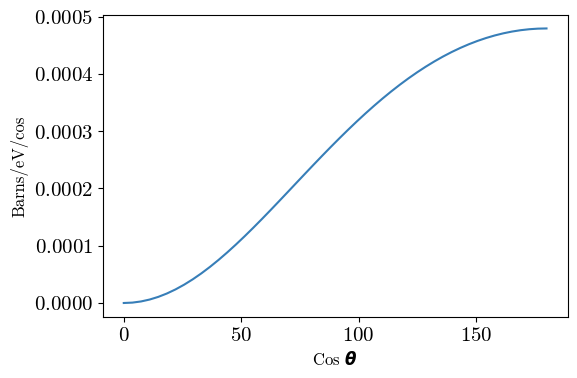

In [4]:
A = Si_migdal.A
m_n = 0.939*1e9 #m_n in eV
N_per_g = (6.02e23/A)
barns_to_cm2 = 1e-24
flux = 1e3 #nuetrons/cm^2/second
seconds_to_days = 60*60*24 #seconds to days
phi_int = 2*np.pi #integral over phi
thickness = 1 #1 cm
density =  4.99e22 #per cubic cm

xsec_to_events_per_nuetron = density*thickness*barns_to_cm2*phi_int
xsec_to_inv_gram_days = flux*N_per_g*barns_to_cm2*seconds_to_days*phi_int

flux_factor=xsec_to_events_per_nuetron

print(Si_migdal.nuc.SIG(23000))


cross_section_lab = Si_migdal.d2R_dc_dDeltaE(En=23000, method="gpaw_withLFE")

c_range = np.linspace(-1, 1)
angles = np.linspace(0, 180)
plt.plot(angles, cross_section_lab(10, np.cos(np.pi*angles/180)))
plt.xlabel(r"Cos $\theta$")
plt.ylabel("Barns/eV/cos")
plt.show()




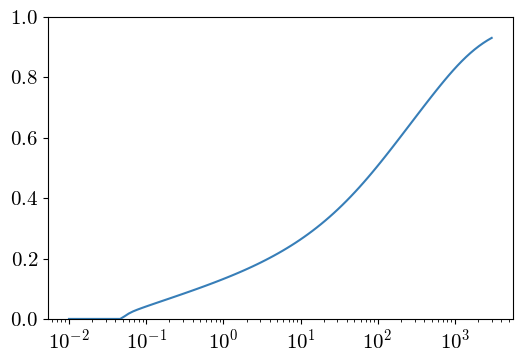

In [5]:
#Validate Sarkis 2022 Quenching data, fig 3 of 2209.04503
sarkis_E_range = np.geomspace(1e-2, 3*1e3, 100) #in keV, we convert to eV when we load sarkis data
quench_arr = []

#I have to do a loop becuase numpy is a dumb dumb
for E in sarkis_E_range:
    quench_arr.append(quench.Y_Si_sarkis2022(1e3*E))

plt.plot(sarkis_E_range, quench_arr)
plt.ylim(0, 1)
plt.xscale('log')

plt.show()


Er = 2.1691647501017357
q_N = 337732.6741956568
0.0
0.0
0.09112238497065375


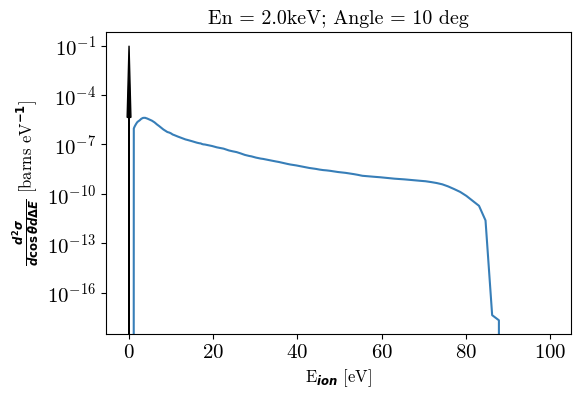

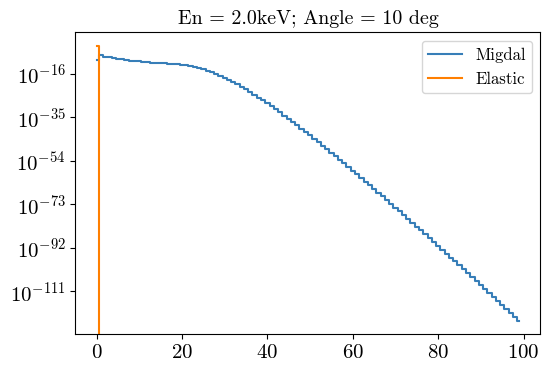

Er = 96.34732612741898
q_N = 2250850.460844567
0.0
0.03978088088108662
0.1522936764557554


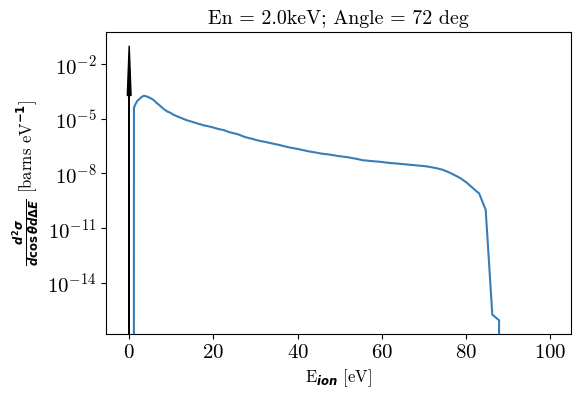

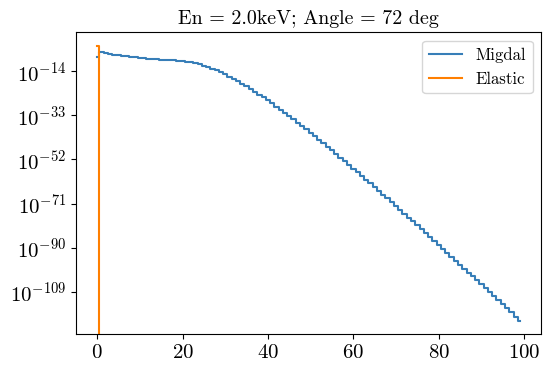

Er = 24.94539462616996
q_N = 1145307.2212391405
0.0
0.0
0.12701644728790512


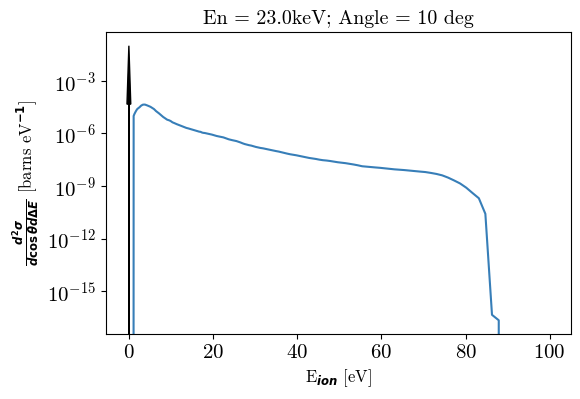

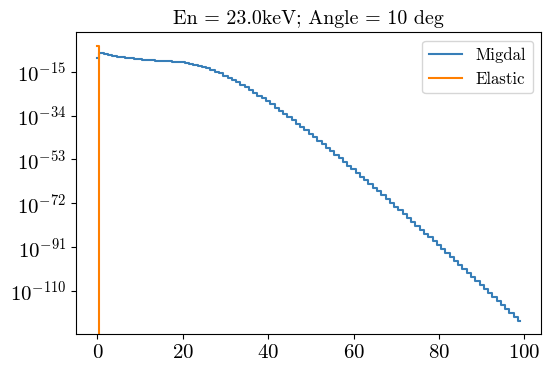

Er = 1107.9942504653181
q_N = 7633005.284058716
0.11880515479643002
0.13678634563757178
0.21283822777409875


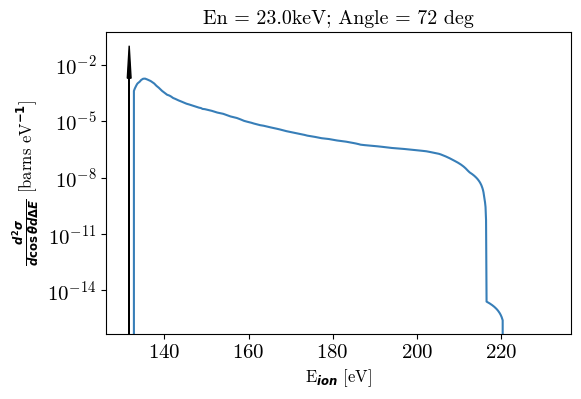

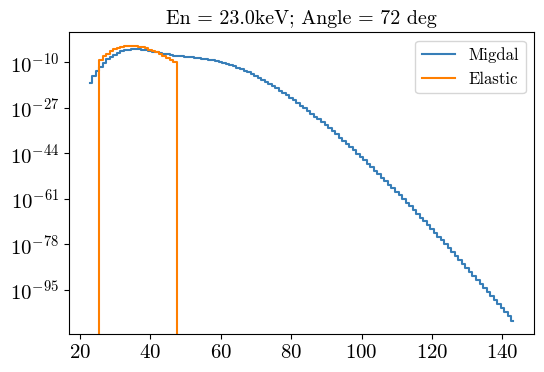

Er = 26.02997700122083
q_N = 1169940.3021659679
0.0
0.0
0.12774628785401984


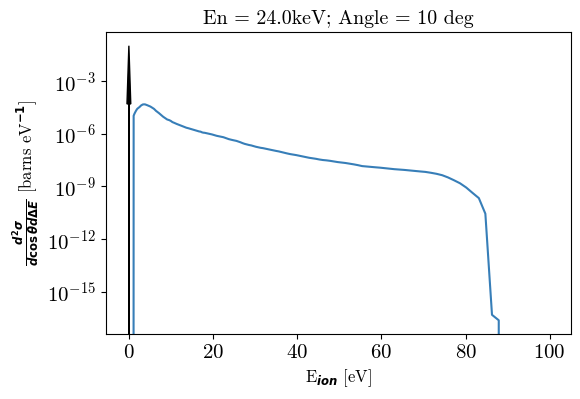

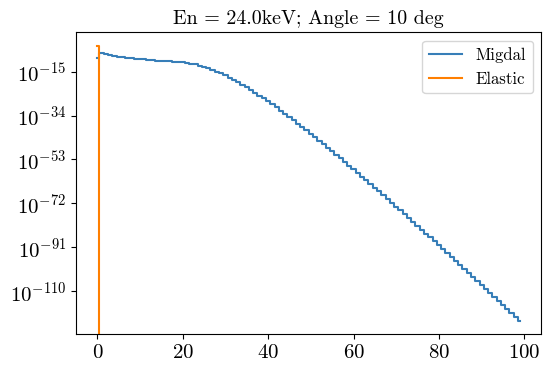

Er = 1156.1679135290278
q_N = 7797174.716845224
0.1220240227700156
0.13869645496116706
0.2141405359996467


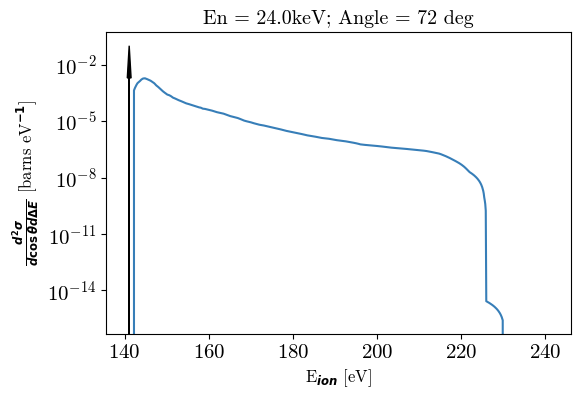

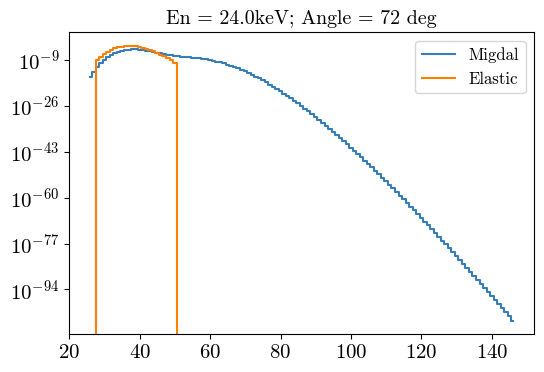

Er = 58.56744825274686
q_N = 1754910.4532489516
0.0
0.016774212566733712
0.14245191816824132


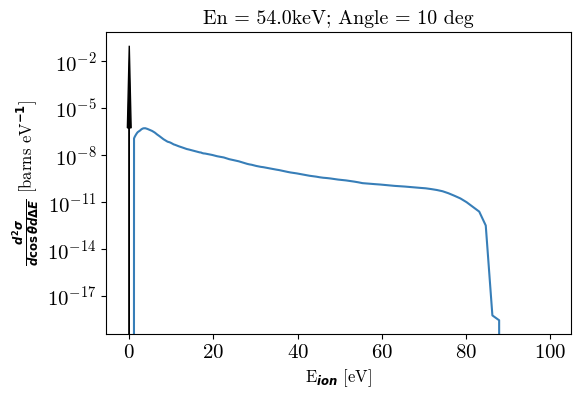

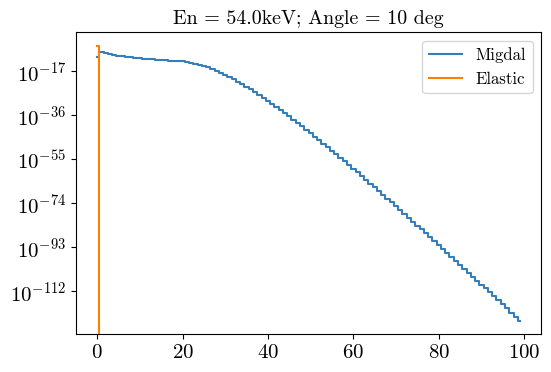

Er = 2601.3778054403124
q_N = 11695762.075267836
0.17724415767808757
0.17817240987693436
0.2414534785320885


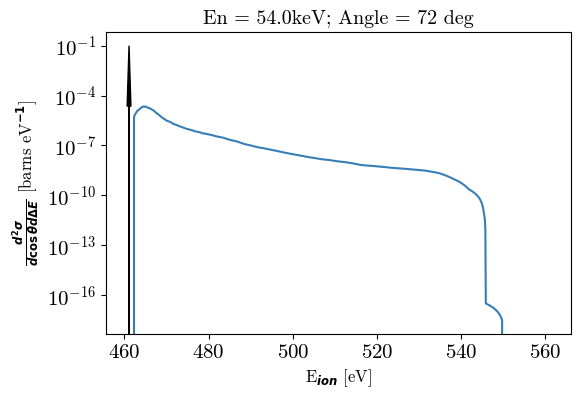

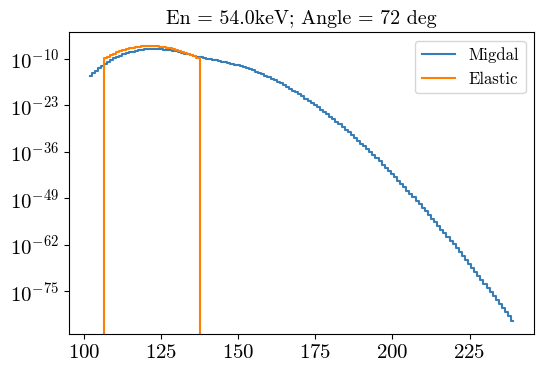

Er = 2719.0480142525253
q_N = 11957358.43660525
0.1805307871289693
0.18052696735160764
0.24310189802535667


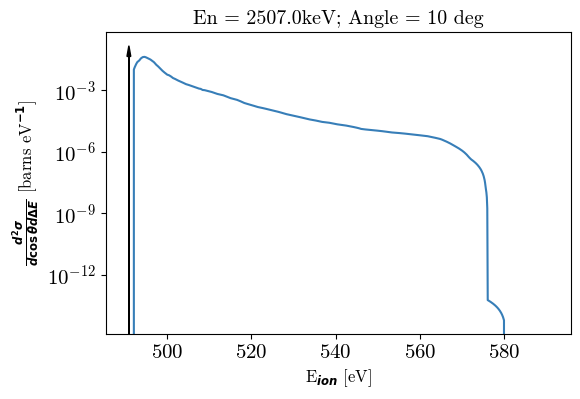

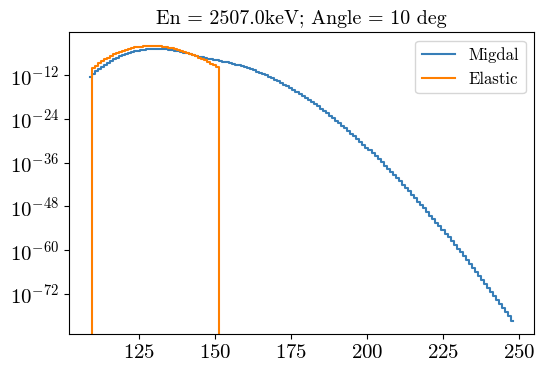

Er = 120771.37330071967
q_N = 79690914.74970683
0.5325728475582832
0.5329447931137377
0.5325728475582832


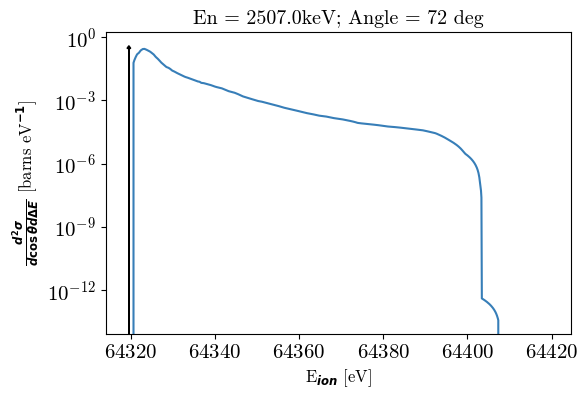

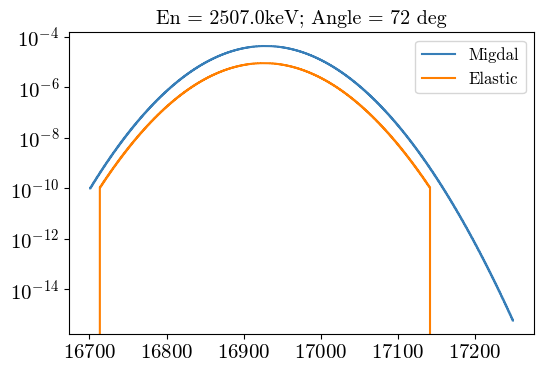

Er = 2.1691647501017357
q_N = 337732.6741956568
0.0
0.0
0.09112238497065375


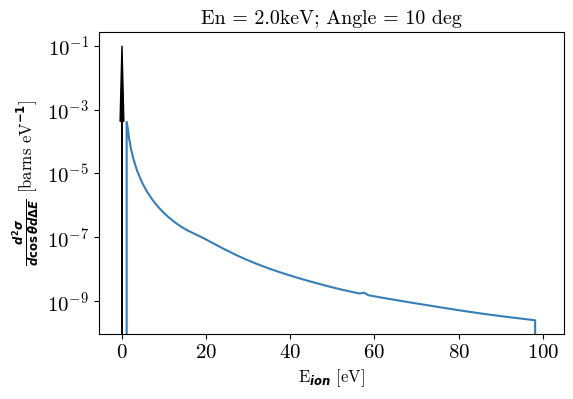

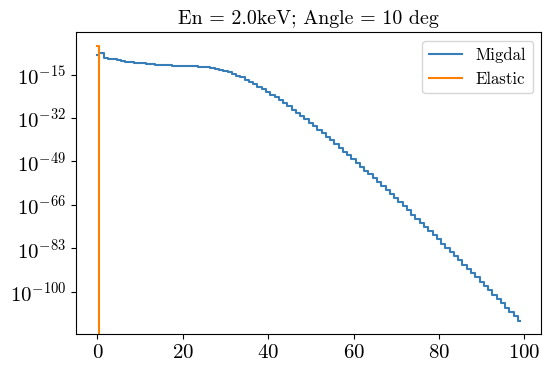

Er = 96.34732612741898
q_N = 2250850.460844567
0.0
0.03978088088108662
0.1522936764557554


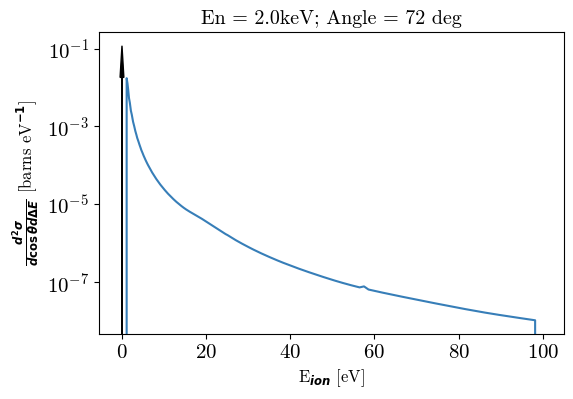

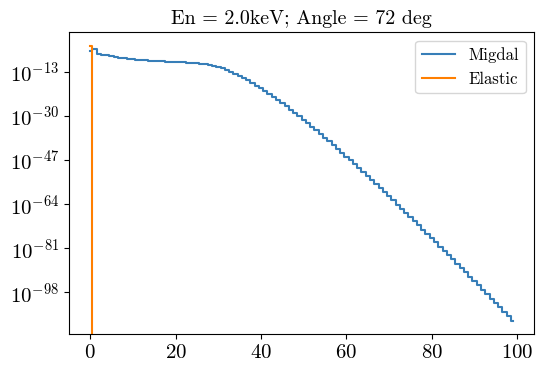

Er = 24.94539462616996
q_N = 1145307.2212391405
0.0
0.0
0.12701644728790512


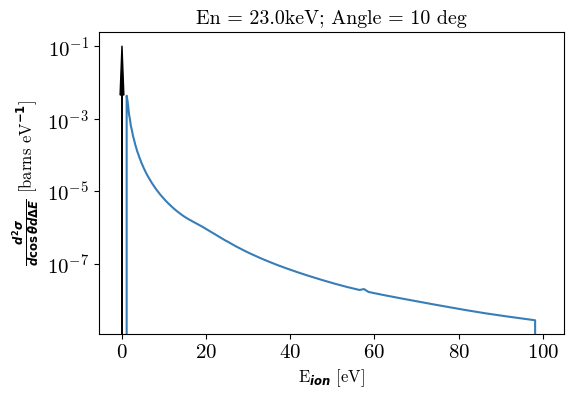

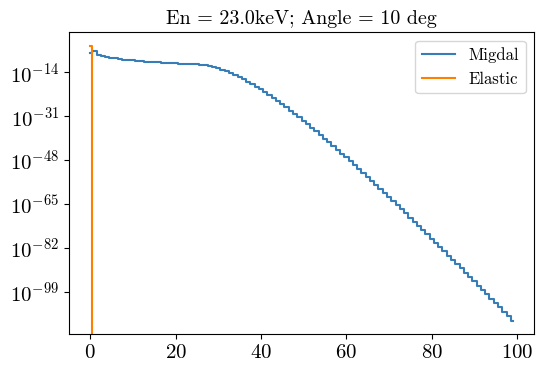

Er = 1107.9942504653181
q_N = 7633005.284058716
0.11880515479643002
0.13678634563757178
0.21283822777409875


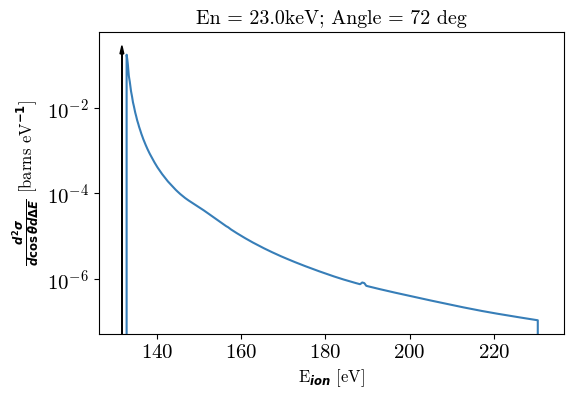

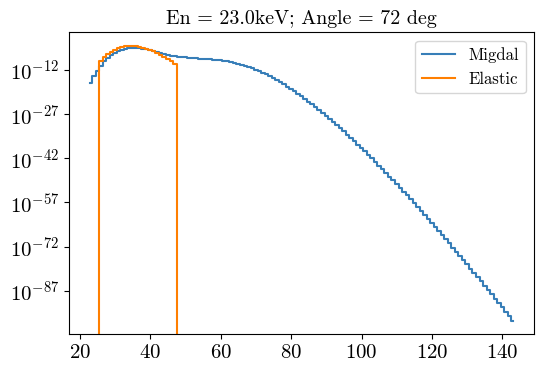

Er = 26.02997700122083
q_N = 1169940.3021659679
0.0
0.0
0.12774628785401984


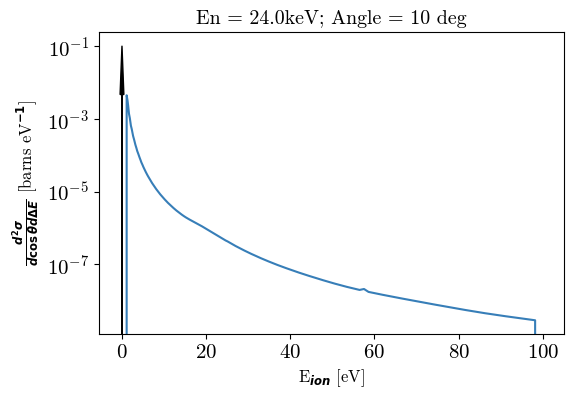

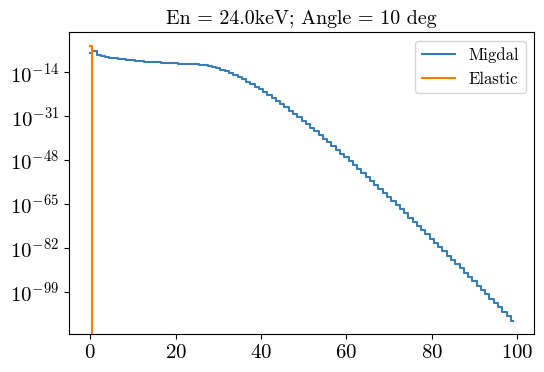

Er = 1156.1679135290278
q_N = 7797174.716845224
0.1220240227700156
0.13869645496116706
0.2141405359996467


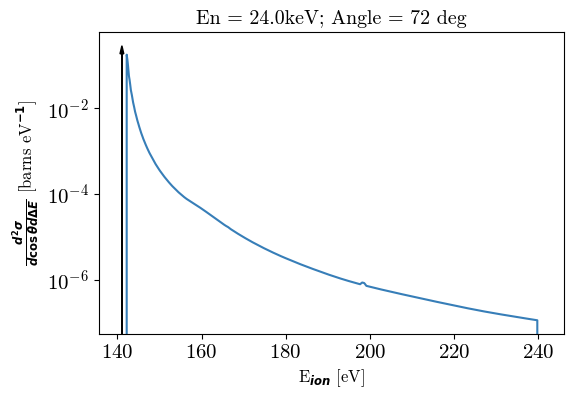

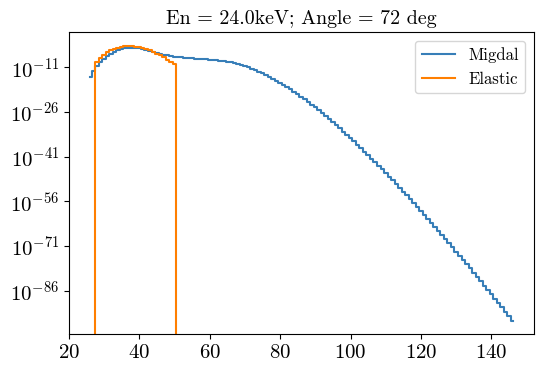

Er = 58.56744825274686
q_N = 1754910.4532489516
0.0
0.016774212566733712
0.14245191816824132


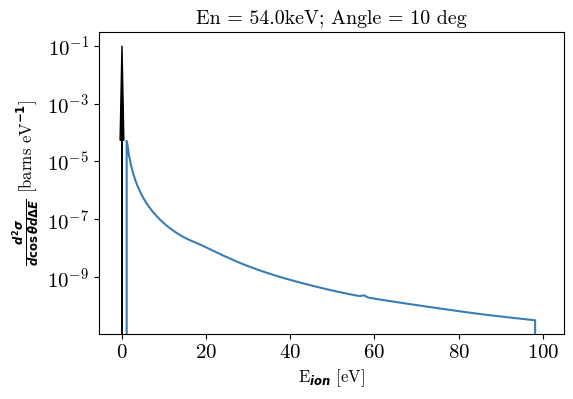

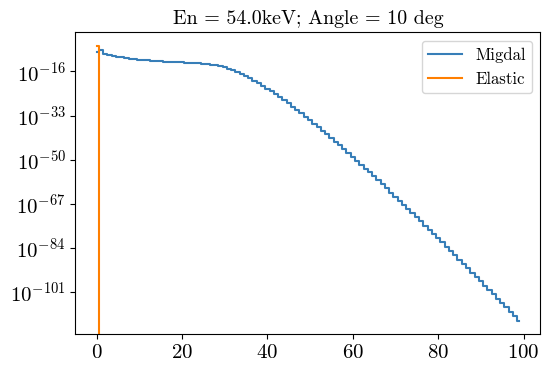

Er = 2601.3778054403124
q_N = 11695762.075267836
0.17724415767808757
0.17817240987693436
0.2414534785320885


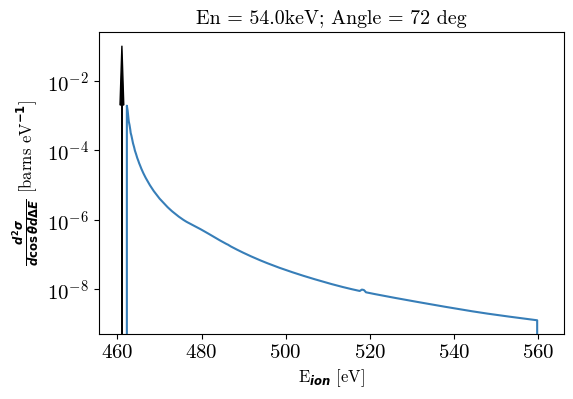

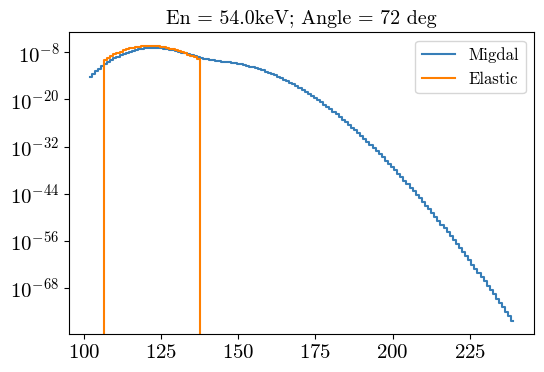

Er = 2719.0480142525253
q_N = 11957358.43660525
0.1805307871289693
0.18052696735160764
0.24310189802535667


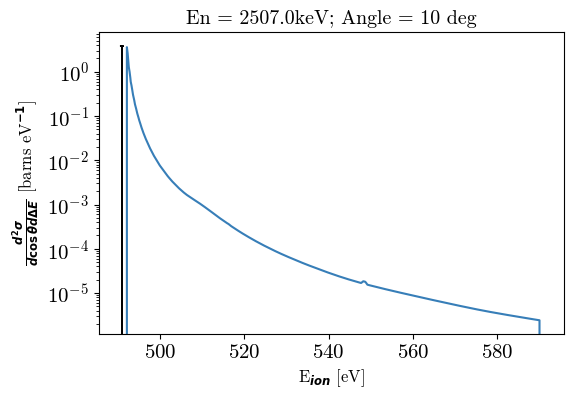

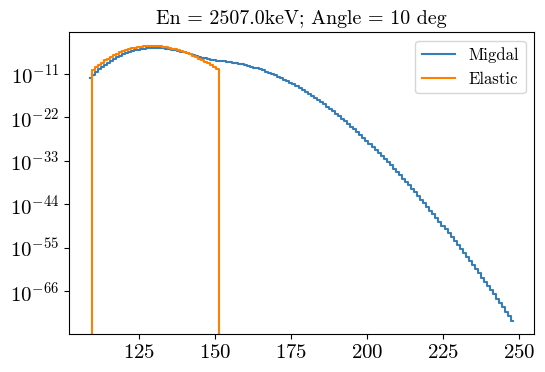

Er = 120771.37330071967
q_N = 79690914.74970683
0.5325728475582832
0.5329447931137377
0.5325728475582832


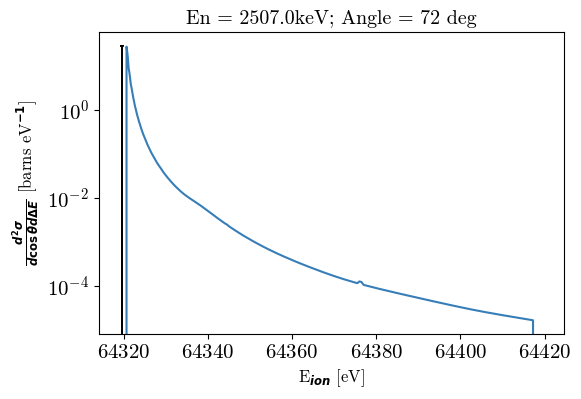

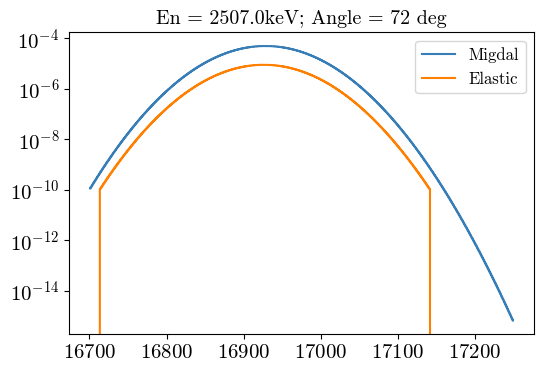

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 2.1691647501017357
q_N = 337732.6741956568
0.0
0.0
0.09112238497065375


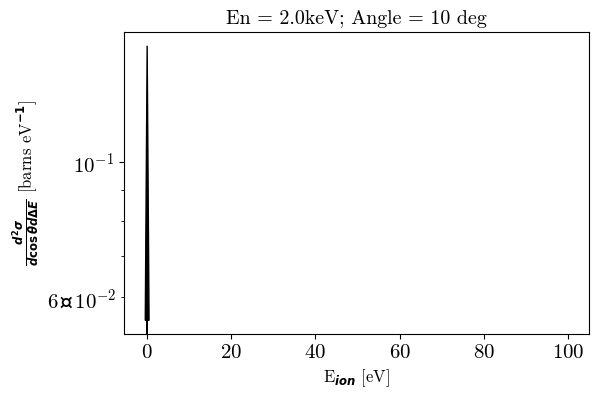

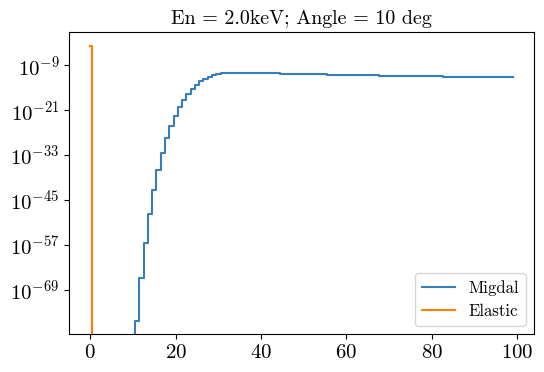

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 96.34732612741898
q_N = 2250850.460844567
0.0
0.03978088088108662
0.1522936764557554


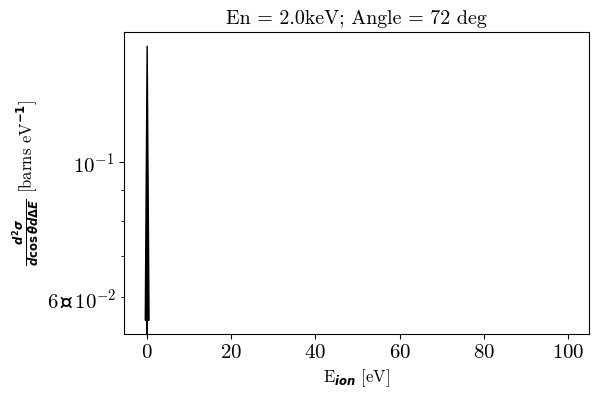

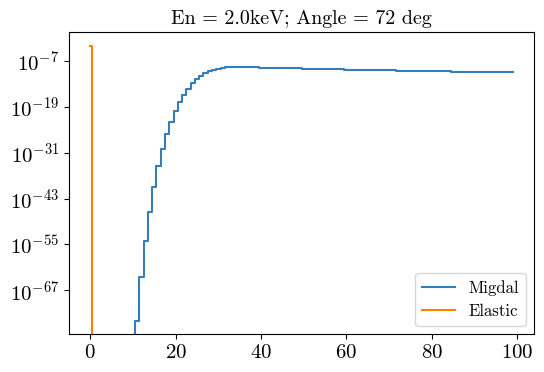

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 24.94539462616996
q_N = 1145307.2212391405
0.0
0.0
0.12701644728790512


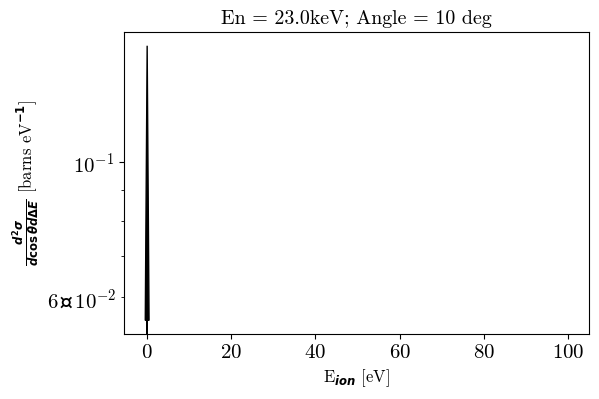

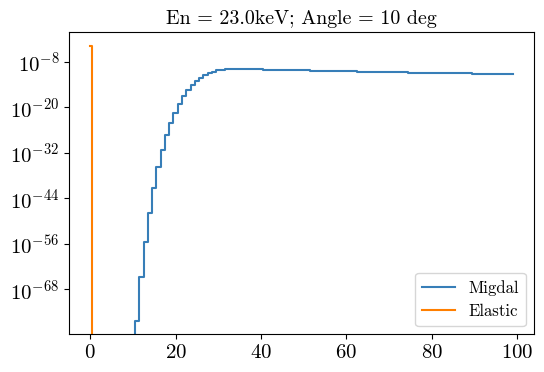

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 1107.9942504653181
q_N = 7633005.284058716
0.11880515479643002
0.13678634563757178
0.21283822777409875


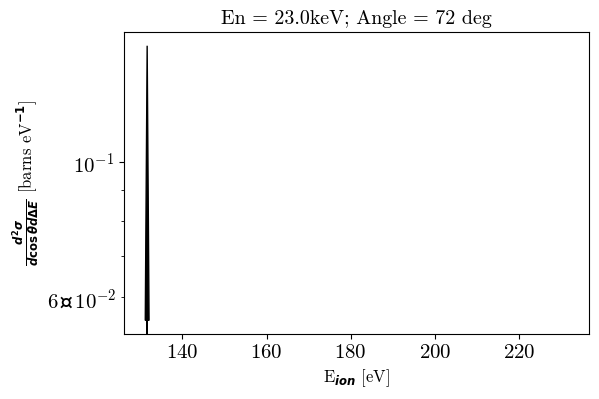

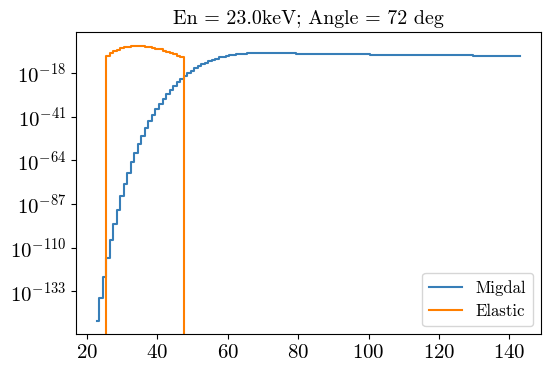

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 26.02997700122083
q_N = 1169940.3021659679
0.0
0.0
0.12774628785401984


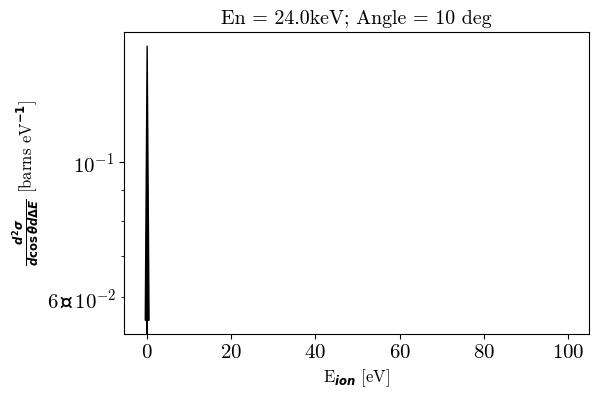

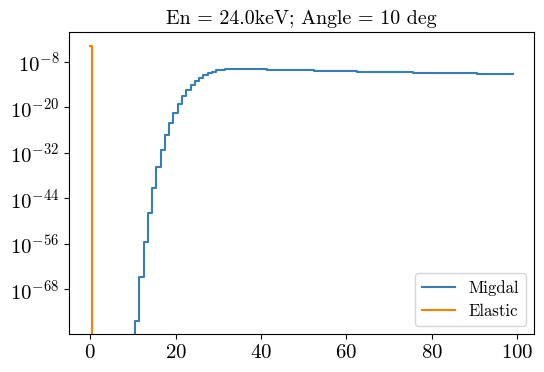

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 1156.1679135290278
q_N = 7797174.716845224
0.1220240227700156
0.13869645496116706
0.2141405359996467


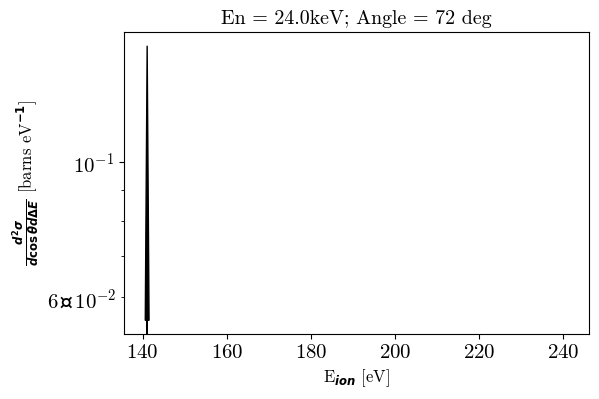

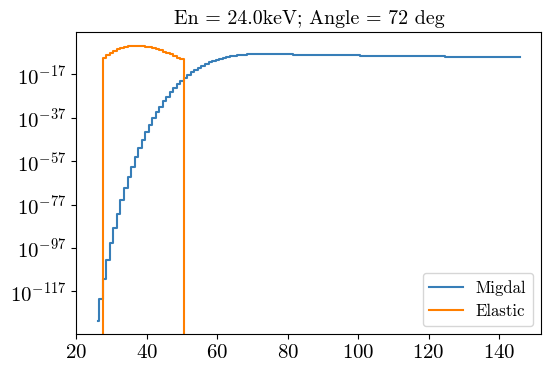

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 58.56744825274686
q_N = 1754910.4532489516
0.0
0.016774212566733712
0.14245191816824132


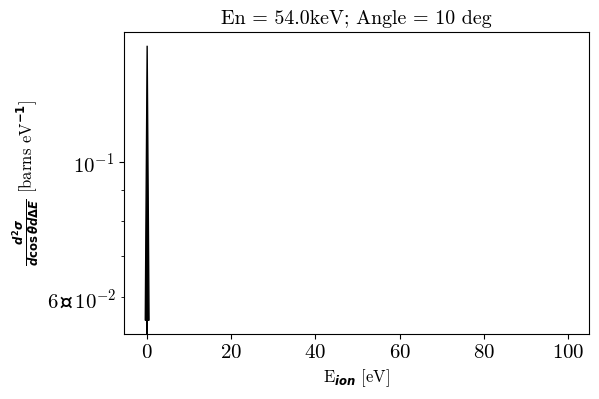

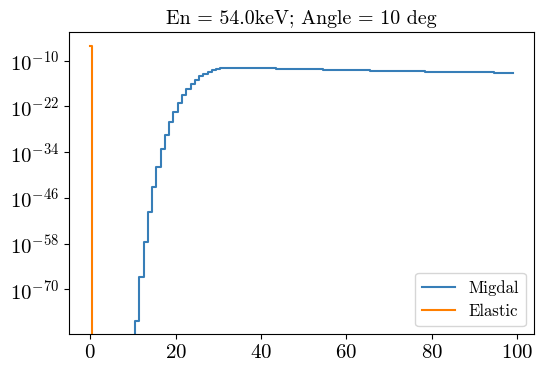

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 2601.3778054403124
q_N = 11695762.075267836
0.17724415767808757
0.17817240987693436
0.2414534785320885


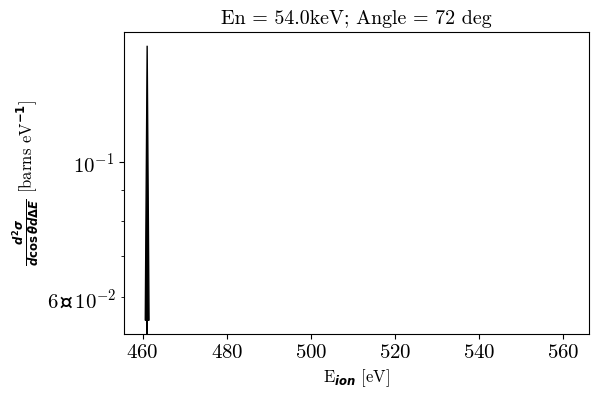

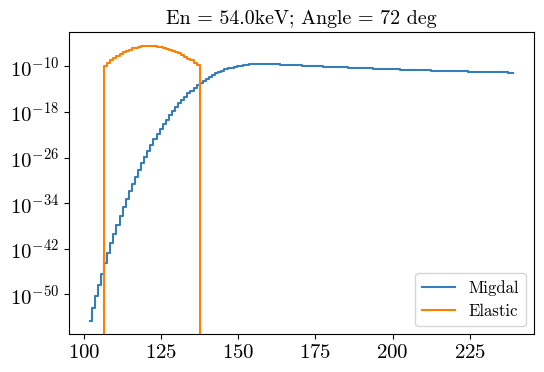

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 2719.0480142525253
q_N = 11957358.43660525
0.1805307871289693
0.18052696735160764
0.24310189802535667


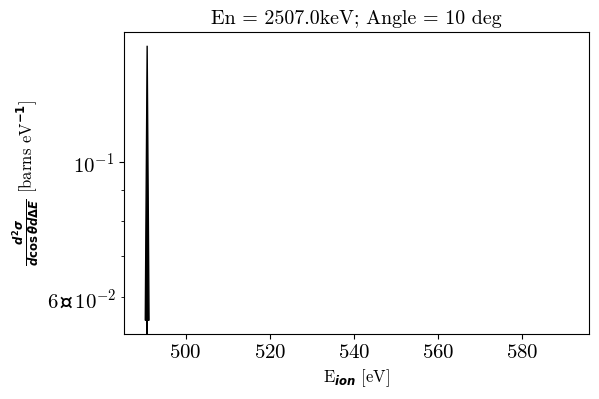

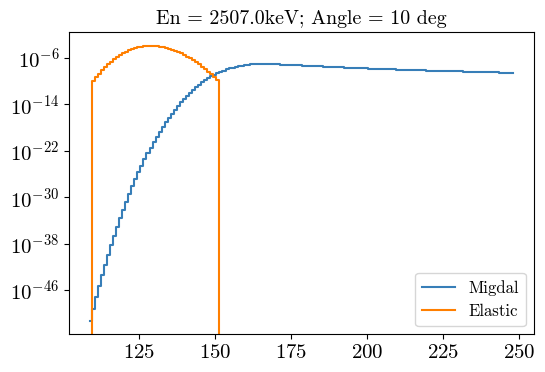

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


Er = 120771.37330071967
q_N = 79690914.74970683
0.5325728475582832
0.5329447931137377
0.5325728475582832


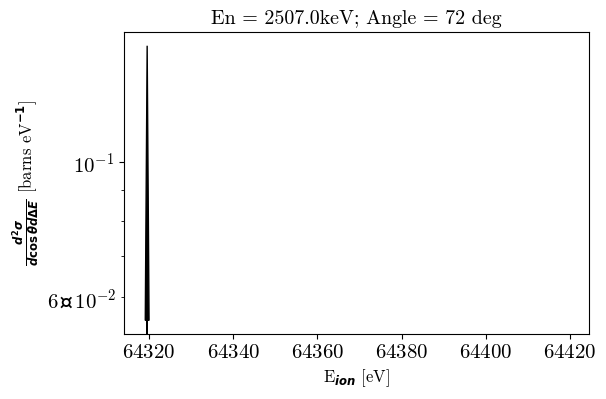

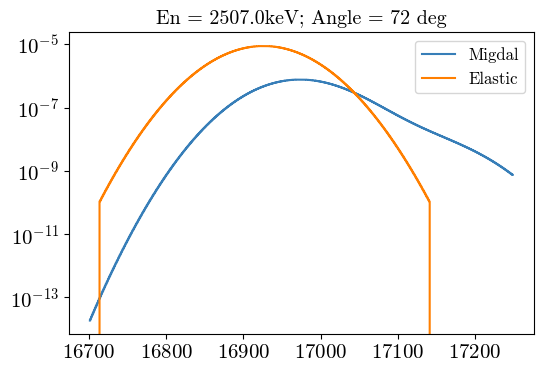

In [6]:
methods = ["gpaw_withLFE", "mermin", "ibe"]

for method in methods:

    for En in Energies:
        elastic_spectrum = Si_migdal.nuc.dSig_dOmega(En)

        for angle in Angles:
            save_folder = './output/' + str(int(1e-3*En)) + 'keV/' + str(angle) + 'deg/' 
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)

            c = np.cos(angle*np.pi/180)
            
            
            #define spectra
            Si_ion_spec_sarkis = Si_migdal.dR_dEion(c, En, YS, method)
            Si_ion_spec_sarkis22 = Si_migdal.dR_dEion(c, En, YS22, method)
            Si_ion_spec_lind   = Si_migdal.dR_dEion(c, En, YL, method)

            print("Er = " + str(kin.E_Recoil(0, c, A, En)))
            print("q_N = " + str(np.sqrt(2*A*m_n*kin.E_Recoil(0, c, A, En))))
    
            #Qeunched elastic recoil energy
            ER_Q_sarkis = kin.E_Recoil(0, c, A, En)*YS(kin.E_Recoil(0, c, A, En))
            ER_Q_sarkis22 = kin.E_Recoil(0, c, A, En)*YS22(kin.E_Recoil(0, c, A, En))
            ER_Q_lind   = kin.E_Recoil(0, c, A, En)*YL(kin.E_Recoil(0, c, A, En))

            print(YS(kin.E_Recoil(0, c, A, En)))
            print(YS22(kin.E_Recoil(0, c, A, En)))
            print(YL(kin.E_Recoil(0, c, A, En)))

            elastic_rate = flux_factor*elastic_spectrum(c)*np.sin(angle*np.pi/180)*np.pi/180

            #Plot the ionization spectrum
            E_ion_range = np.geomspace(ER_Q_sarkis + 1e-6, ER_Q_sarkis + 100, 1000)
            plt.plot(E_ion_range, Si_ion_spec_sarkis(E_ion_range))
            xmin, xmax, ymin, ymax = plt.axis()

            plt.arrow(ER_Q_sarkis, ymin, 0, ymax -ymin, head_width=0.9, head_length=1e-1,fc='black')
            plt.yscale('log')

            plt.ylabel(r'$\frac{d^2 \sigma}{d \cos \theta d \Delta E}$ [barns eV$^{-1}$]')
            plt.xlabel(r'E$_{ion}$ [eV]')
            plt.title("En = " + str(1e-3*En) + "keV; Angle = " + str(angle) + " deg")
            plt.savefig(save_folder + 'E_ion.png')
            plt.show()

            #Estimate the first and last electron bins we need to consider
            fano = 0.119 #fano factor
            eps  = 3.8 #energy per eh pair
            n_base_sarkis = np.floor(ER_Q_sarkis/eps)
            n_base_lind   = np.floor(ER_Q_lind/eps)

            first_n_sarkis = max(np.floor(ER_Q_sarkis/eps) - 5*np.sqrt(fano*n_base_sarkis), 0)
            first_n_lind   = max(np.floor(ER_Q_lind/eps)   - 5*np.sqrt(fano*n_base_lind), 0)

            final_n_sarkis = np.floor(ER_Q_sarkis/eps) + 5*np.sqrt(fano*n_base_sarkis) + 100
            final_n_lind   = np.floor(ER_Q_lind/eps)   + 5*np.sqrt(fano*n_base_lind) + 100

            n_bins_sarkis = final_n_sarkis - first_n_sarkis
            n_bins_lind   = final_n_lind   - first_n_lind

            n_sarkis, r_sarkis = ion.Si_electron_spectrum(Si_ion_spec_sarkis, ER_Q_sarkis, \
                                                          start_bin=first_n_sarkis, number_of_bins=n_bins_sarkis,flux=flux_factor*np.sin(angle*np.pi/180)*np.pi/180)
            
            n_sarkis22, r_sarkis22 = ion.Si_electron_spectrum(Si_ion_spec_sarkis22, ER_Q_sarkis22, \
                                                          start_bin=first_n_sarkis, number_of_bins=n_bins_sarkis,flux=flux_factor*np.sin(angle*np.pi/180)*np.pi/180)
            
            n_lind, r_lind     = ion.Si_electron_spectrum(Si_ion_spec_lind, ER_Q_lind, \
                                                          start_bin=first_n_lind, number_of_bins=n_bins_lind,flux=flux_factor*np.sin(angle*np.pi/180)*np.pi/180)

            n_el_sarkis, r_el_sarkis = ion.Si_elastic_electron_spectrum_fixed_angle(ER_Q_sarkis, elastic_rate, \
                                                                                   start_bin=first_n_sarkis, number_of_bins=n_bins_sarkis)
        
            n_el_sarkis22, r_el_sarkis22 = ion.Si_elastic_electron_spectrum_fixed_angle(ER_Q_sarkis22, elastic_rate, \
                                                                                   start_bin=first_n_sarkis, number_of_bins=n_bins_sarkis)
            
            n_el_lind, r_el_lind     = ion.Si_elastic_electron_spectrum_fixed_angle(ER_Q_lind, elastic_rate, \
                                                                                   start_bin=first_n_lind, number_of_bins=n_bins_lind)

            plt.step(n_sarkis, r_sarkis, where='mid',label='Migdal')
            plt.step(n_el_sarkis, r_el_sarkis, where='mid',label='Elastic')
            plt.title("En = " + str(1e-3*En) + "keV; Angle = " + str(angle) + " deg")
            plt.legend()
            plt.yscale('log')


            plt.show()
            
            #Save everything
            np.savetxt(save_folder + method + '_Ne_sarkis_migdal.csv', list(zip(n_sarkis, r_sarkis)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')

            np.savetxt(save_folder + method + '_Ne_sarkis_elastic.csv', list(zip(n_el_sarkis, r_el_sarkis)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')
            
            
            np.savetxt(save_folder + method + '_Ne_sarkis_migdal22.csv', list(zip(n_sarkis22, r_sarkis22)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')

            np.savetxt(save_folder + method + '_Ne_sarkis_elastic22.csv', list(zip(n_el_sarkis22, r_el_sarkis22)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')
            

            np.savetxt(save_folder + method +'_Ne_lindhard_migdal.csv', list(zip(n_lind, r_lind)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')

            np.savetxt(save_folder + method +'_Ne_lindhard_elastic.csv', list(zip(n_el_lind, r_el_lind)), \
                       delimiter=',', fmt='%.5e', header='bin number, rate')
